In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from skimage.transform import resize
from FTM2D import *
from CoverAlgorithm import *

f = FTM2D()
feats = CoverAlgorithm.load_features(f, 10)
hpcp_orig = feats['crema'].T
# Synchronize HPCP to the beats
#onsets = feats['madmom_features']['onsets']
#hpcp = librosa.util.sync(hpcp_orig, onsets, aggregate=np.median)


Initialized FTM2D algorithm on 160 songs in dataset Covers80


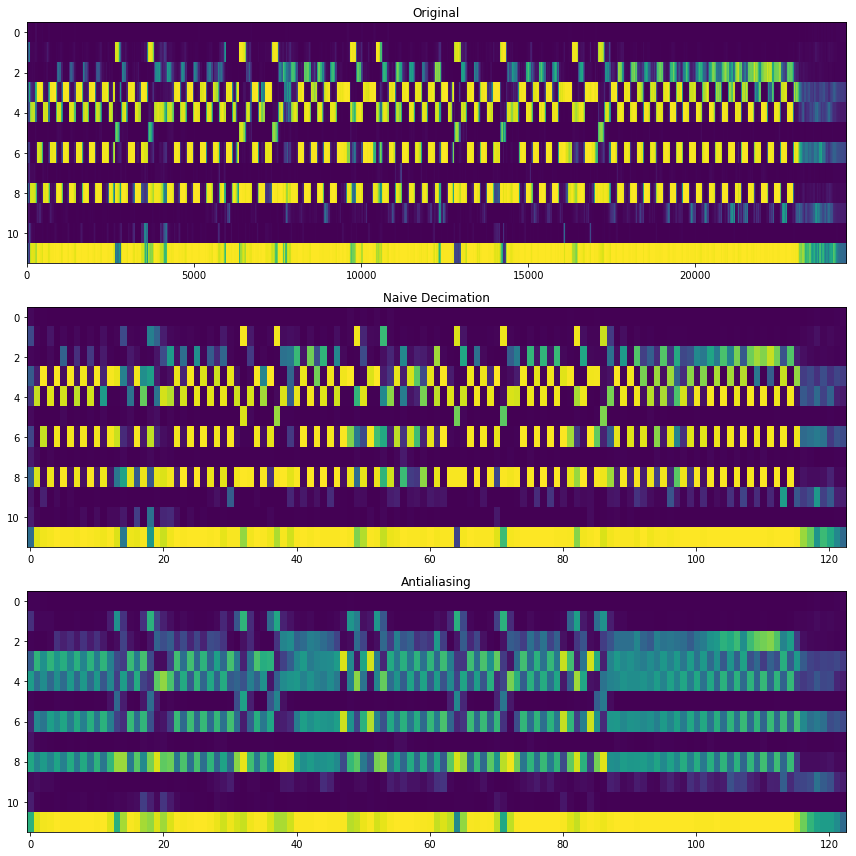

In [6]:
fac = 200 # Downsample by this factor

## Step 1: Do stupid decimation
hpcp_dec = hpcp_orig[:, 0::fac]

## Step 2: Do resizing with antialiasing
hpcp_antialias = resize(hpcp_orig, hpcp_dec.shape, anti_aliasing=True)


plt.figure(figsize=(12, 12))
plt.subplot(311)
plt.imshow(hpcp_orig, aspect='auto')
plt.title("Original")
plt.subplot(312)
plt.imshow(hpcp_dec, aspect='auto')
plt.title("Naive Decimation")
plt.subplot(313)
plt.imshow(hpcp_antialias, aspect='auto')
plt.title("Antialiasing")
plt.tight_layout()